In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine

In [163]:
iris_dataset = load_iris()

In [164]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [165]:
print( type(iris_dataset) )
print( iris_dataset.keys() )
# print( iris_dataset['DESCR'] )
print( iris_dataset['data'][:3, :])
print( iris_dataset['target'][:3])
print( np.unique(iris_dataset['target']) )
print( iris_dataset['target_names'] )

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]
[0 1 2]
['setosa' 'versicolor' 'virginica']


In [166]:
def net_input(X, w):
    return np.dot(X, w[1:]) + w[0]


In [167]:
def activation(v):
    # if v <= 0:
    #    return -1
    # else: 0
    #    return -1
    return 1 if v > 0 else -1



In [168]:
net_input([1, 2, 3, 4, 5], [10, 20, 30, 40, 50 ,60])

np.int64(710)

In [169]:
activation(0.7), activation(-0.2)

(1, -1)

In [170]:
def predict(X, w):
    net_value = net_input(X, w)
    activated_value = activation(net_value)
    return activated_value

In [171]:
predict([1, 2, 3, 4, 5], [10, 20, 30, 40, 50 ,60])

1

In [224]:
def fit(X, y, eta, n_iter):
    w = np.zeros(X.shape[1] + 1)
    errors = np.zeros(n_iter)
    
    for idx in np.arange(n_iter):
        sum_of_error = 0
        for xv, t in zip(X, y):
            output = predict(xv, w)
            error = t - output
            # sum_of_error += error
            sum_of_error += 1 if error != 0 else 0
            delta = eta * error
            w[1:] += delta * xv
            w[0] += delta * 1

        errors[idx] = sum_of_error
    
    return w, errors

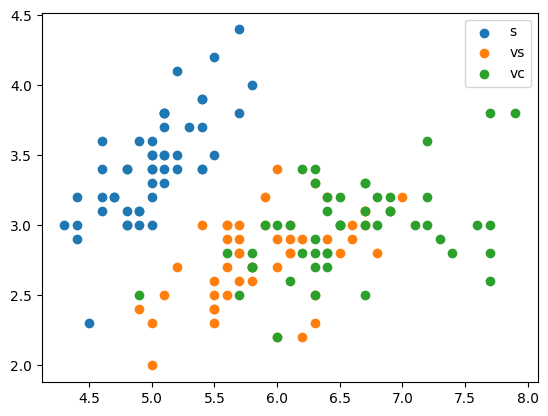

In [225]:
X = iris_dataset['data']
plt.scatter(X[:50, 0], X[:50, 1], label='s')
plt.scatter(X[50:100, 0], X[50:100, 1], label='vs')
plt.scatter(X[100:150, 0], X[100:150, 1], label='vc')
plt.legend()
plt.show()

In [226]:
X = iris_dataset['data'][:100]
y = list( map(lambda v: -1 if v == 0 else 1, iris_dataset['target'][:100]) )
eta, n_iter = 0.1, 10

result_w, result_errors = fit(X, y, eta, n_iter)

In [227]:
result_w, result_errors

(array([-0.2 , -0.22, -0.72,  1.04,  0.44]),
 array([1., 3., 1., 0., 0., 0., 0., 0., 0., 0.]))

In [228]:
sum_of_error = 0
for vx, t in zip(X, y):
    predicted_value = predict(vx, result_w)
    sum_of_error += (predicted_value != t)

print("Accuracy : {0}".format(1- (sum_of_error / 100)))

Accuracy : 1.0


In [229]:
wine_dataset = load_wine()
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [230]:
wine_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [231]:
count = np.bincount(wine_dataset['target'])

In [232]:
print(count[0])
print(count[1])
print(count[2])

59
71
48


In [233]:
X = wine_dataset['data'][:130]
y = wine_dataset['target'][:130]
y = np.where(y == 0, -1, 1)
eta, n_iter = 0.1, 10

result_w, result_errors = fit(X, y, eta, n_iter)

In [234]:
result_w, result_errors

(array([ 1.6  , 16.388,  0.342,  1.538, 15.52 , 88.8  ,  1.79 , -2.842,
         0.938, -2.708, -1.674,  1.978, -1.078, 75.   ]),
 array([1., 3., 2., 3., 3., 3., 2., 3., 3., 3.]))

In [235]:
sum_of_error = 0
for vx, t in zip(X, y):
    predicted_value = predict(vx, result_w)
    sum_of_error += (predicted_value != t)

print("Accuracy : {0}".format(1- (sum_of_error / 130)))

Accuracy : 0.5461538461538462


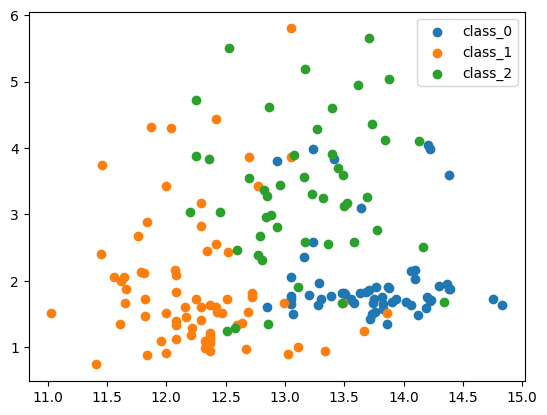

In [236]:
X = wine_dataset['data']
plt.scatter(X[:59, 0], X[:59, 1], label='class_0')
plt.scatter(X[59:130, 0], X[59:130, 1], label='class_1')
plt.scatter(X[130:178, 0], X[130:178, 1], label='class_2')
plt.legend()
plt.show()

In [248]:
X = wine_dataset['data'][59:178]
y = wine_dataset['target'][59:178]
y = np.where(y == 1, -1, 1)
eta, n_iter = 0.1, 10

result_w, result_errors = fit(X, y, eta, n_iter)

In [249]:
result_w, result_errors

(array([-0.2  , -1.54 ,  0.516,  1.332, 10.36 , 45.4  , -1.358,  0.974,
        -0.316,  0.918,  2.886, -0.816, -1.348, 98.   ]),
 array([1., 3., 2., 2., 2., 2., 3., 2., 2., 2.]))

In [250]:
sum_of_error = 0
for vx, t in zip(X, y):
    predicted_value = predict(vx, result_w)
    sum_of_error += (predicted_value != t)

print("Accuracy : {0}".format(1- (sum_of_error / 119)))

Accuracy : 0.40336134453781514


In [279]:
x1 = wine_dataset['data'][0:59]
x2 = wine_dataset['data'][130:178]
y1 = wine_dataset['target'][0:59]
y2 = wine_dataset['target'][130:178]

X = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
y = np.where(y == 0, -1, 1)
eta, n_iter = 0.1, 10


from sklearn.preprocessing import MinMaxScaler
X2 = MinMaxScaler().fit_transform(X)

result_w, result_errors = fit(X2, y, eta, n_iter)

In [280]:
result_w, result_errors

(array([ 0.4       , -0.15513308, -0.08526077, -0.00169492,  0.30759494,
         0.04615385, -0.16      , -0.31532033,  0.17391304, -0.17261411,
         0.13860759, -0.19      , -0.63003663, -0.14703557]),
 array([1., 2., 3., 3., 1., 0., 0., 0., 0., 0.]))

In [281]:
sum_of_error = 0
for vx, t in zip(X2, y):
    predicted_value = predict(vx, result_w)
    sum_of_error += (predicted_value != t)

print("Accuracy : {0}".format(1- (sum_of_error / 107)))

Accuracy : 1.0
